In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, \
                            GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve

In [2]:
df = pd.read_csv('churn.csv')

In [3]:
df

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.shape

(10000, 12)

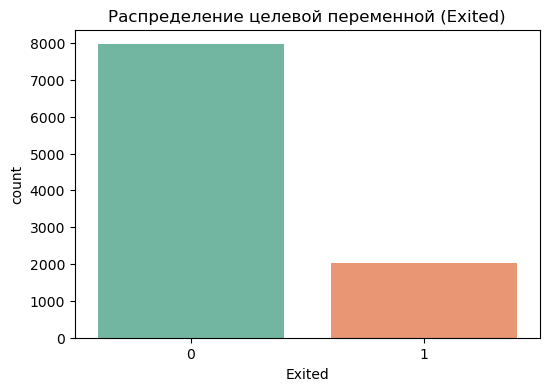

Exited
0    7963
1    2037
Name: count, dtype: int64


In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x='Exited', data=df, palette='Set2')
plt.title('Распределение целевой переменной (Exited)')
plt.show()

print(df['Exited'].value_counts())

In [6]:
df.isna().sum()

CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.dtypes

CustomerId           int64
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [9]:
df

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [10]:
scaler = StandardScaler()
numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [11]:
X = df.drop(['CustomerId', 'Exited'], axis=1)
y = df['Exited']


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9069,-0.326221,-0.660018,-0.350204,1.585405,2,1,1,1.264218,False,True,False
2603,-0.077899,-0.469311,0.687130,1.345318,1,0,1,1.537933,True,False,False
7738,-0.926334,-0.564665,0.341352,-1.225848,2,0,0,1.279659,False,False,True
1579,-0.336568,0.198164,1.032908,-0.621581,1,1,1,1.663871,True,False,True
5058,0.656722,-0.183251,1.378686,1.153648,2,0,1,0.890155,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
5734,1.215448,1.437761,1.032908,-0.108554,1,1,1,-0.534002,False,False,True
5191,0.325625,1.819175,-1.387538,-1.225848,1,1,1,-1.728184,False,False,False
5390,0.874005,-0.087897,-1.387538,-1.225848,3,0,0,-0.136854,False,False,False
860,0.170424,0.388871,1.032908,1.822949,1,1,0,-0.044902,False,False,True


# Логистическая регрессия

In [15]:
lg = LogisticRegression(class_weight='balanced')
lg.fit(X_train, y_train)
y_pred_prob_lg = lg.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob_lg)
print(f'ROC AUC: {roc_auc:.2f}')

ROC AUC: 0.78


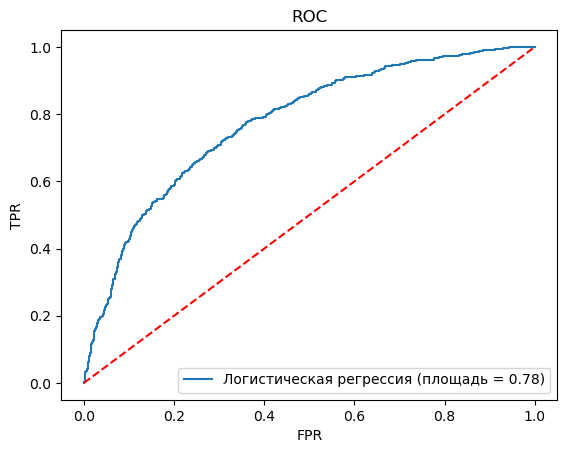

In [16]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lg)
plt.plot(fpr, tpr, label='Логистическая регрессия (площадь = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()


# Случайный лес

In [18]:
rf = RandomForestClassifier(n_estimators=100, max_depth=10,\
                            class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred_prob_rf = rf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_prob_rf)
print(f'ROC AUC: {roc_auc:.2f}')

ROC AUC: 0.86


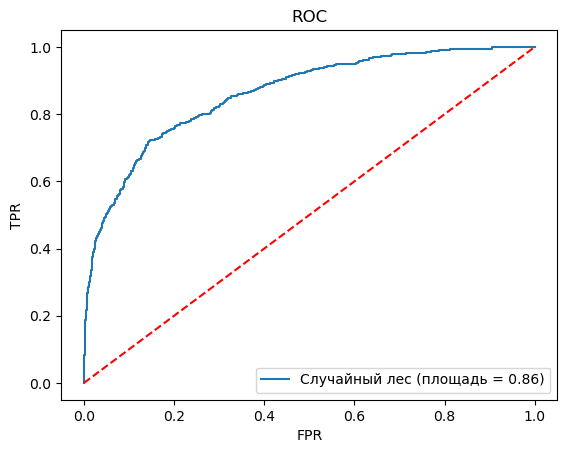

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf)
plt.plot(fpr, tpr, label='Случайный лес (площадь = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()
